
# Project: Investigate a Dataset - TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this project, I will be investigating TMDB Movie dataset using pyhton libraries (pandas, numpy and matplotlib). TMBD Movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb).

The dataset contains the following columns:
1. id - A unique identifier for each movie.
2. imdb_id - Unique identifier for each movie on IMDB
3. popularity - A numeric quantity specifying the movie popularity
4. budget - The movie's budget
5. revenue - The revenue generated by the movie
6. original_title - The title of the movie
7. cast - The name of lead and supporting actors
8. homepage - A link to the homepage of the movie
9. director - Director of the movie
10. tagline - Movie's tagline
11. keywords - The keywords or tags related to the movie
12. overview - A brief description of the movie
13. runtime - Running time of the movie in minutes
14. genre - The genre of the movie
15. production_companies - The production companies of the movie
16. release_date - The date on which the movie was released
17. vote_count - number of vote ratings the movie recieved
18. vote_average - average ratings the movie recieved
19. release_year - The year on which the movie was released
20. budget_adj - budget of the movie in terms of 2010 dollars
21. revenue_adj - revenue of the movie in terms of 2010 dollars 


### Question(s) for Analysis
1. How did amount of movies produced change over the years?
2. What are the most profitable movies?
3. What are the top movies based on popularity?
4. What is the relationship between profit and popularity?
5. What are the top genres produced?
6. What is the relationship between revenue and budget?

In [1]:
# importing packages/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [15]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# reading the data into data frame
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# viewing the first 3 rows
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# checking for number of rows and columns
df.shape

(10866, 21)

In [5]:
# inspecting the columns properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


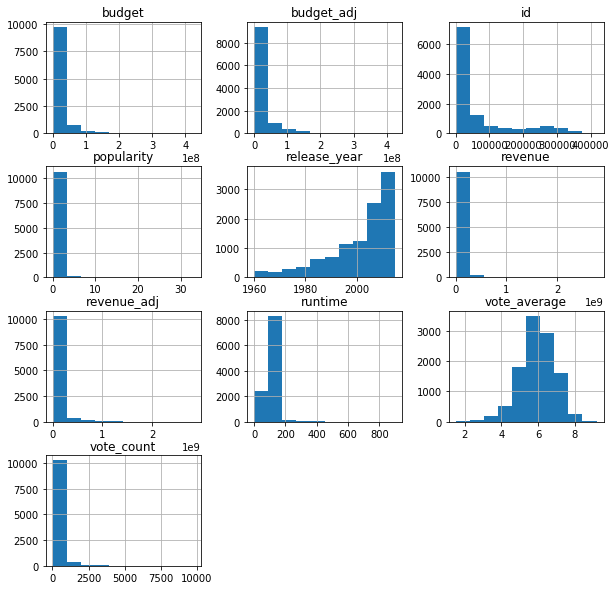

In [7]:
# inspecting the distribution of variables using histogram
df.hist(figsize=(10,10));

In [8]:
# number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# checking for duplicates rows
df.duplicated().sum()

1

After assessing the data, I observed that the data has data quality issues like duplicate rows, null values in some columns. Also, most of movies have zero (0) budget and revenue, which may affect the result of the analysis.
I will be addressing these issues in the next section.


### Data Cleaning 

#### Droping columns that are not required for the analysis

In [11]:
# columns that are not needed
col = ['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'keywords', 'runtime', 
       'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']
# droping columns
df.drop(col, axis = 1, inplace = True)

#### Handling zero values from the budget and revenue columns

In [12]:
# replacing zero values with nan
df['budget'].replace(0, np.NAN, inplace = True)
df['revenue'].replace(0, np.NAN, inplace = True)

#### Droping null values in the dataframe

In [13]:
df.dropna(inplace = True)

#### Droping duplicates rows

In [14]:
df.drop_duplicates(inplace = True)

#### Converting the release date column to datetime data type

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])

#### Assessing the data frame after cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
release_year      3854 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 271.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How did amount of movies produced changed over the years?

In [17]:
# counting the number of produced in each year
movies_by_year = df.groupby('release_year').id.count()
movies_by_year

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     57
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    127
2003    121
2004    147
2005    163
2006    169
2007    165
2008    167
2009    174
2010    178
2011    199
2012    158
2013    180
2014    165
2015    160
Name: id, dtype: int64

Text(0,0.5,'Number of Movies')

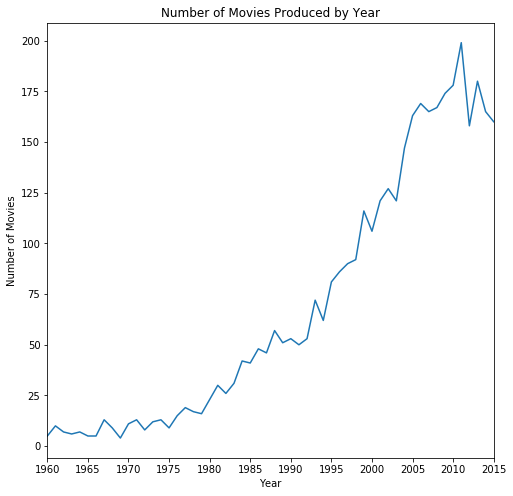

In [18]:
# visaulizing the result
movies_by_year.plot(kind = 'line', figsize = (8,8), xticks=np.arange(1960,2016,5))
plt.title('Number of Movies Produced by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

### Research Question 2: What are the most profitable movies?

In [19]:
# Calculating profits using revenue and budget column
df['profit'] = df['revenue'] - df['budget']

#getting the top 5 movies based on the profit made
movies_by_profits = df[['original_title', 'profit']]
top5_by_profits = movies_by_profits.sort_values(by = 'profit', ascending= False).head(5)
top5_by_profits

,original_title,profit
1386,Avatar,2.544506e+09
3,Star Wars: The Force Awakens,1.868178e+09
5231,Titanic,1.645034e+09
0,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09


Text(0,0.5,'Original Title')

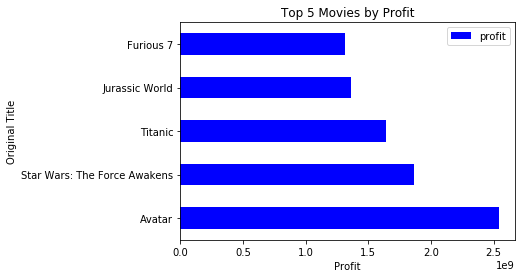

In [20]:
# ploting 
top5_by_profits.set_index('original_title').plot(kind = 'barh', color = 'blue')
plt.title('Top 5 Movies by Profit')
plt.xlabel('Profit')
plt.ylabel('Original Title')

### Research Question 3: What are the top movies based on popularity?

In [21]:
# getting top 5 movies based on popularity
top5_by_popularity = df[['original_title', 'popularity']].sort_values(by ='popularity', ascending = False).head(5)
top5_by_popularity

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507


Text(0,0.5,'Original Title')

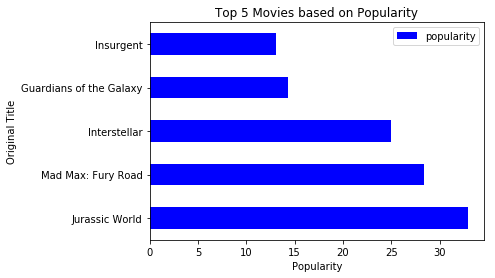

In [22]:
# visualizing the result
top5_by_popularity.set_index('original_title').plot(kind = 'barh', color = 'blue')
plt.title('Top 5 Movies based on Popularity')
plt.xlabel('Popularity')
plt.ylabel('Original Title')

### Research Question 4: What is the relationship between popularity and profit?

In [23]:
# defining a function for ploting scatter plot with trendline
def plot_scatter(col1, col2):
    x = df[col1]
    y = df[col2]
    plt.scatter(x,y)
    z = np.polyfit(x,y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), color = 'red')
    plt.title('{} vs {}'.format(col1,col2))
    plt.xlabel(col1)
    plt.ylabel(col2)

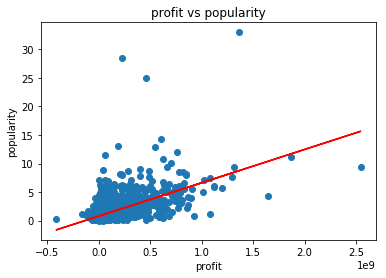

In [24]:
# ploting profit vs popularity 
plot_scatter('profit', 'popularity')

In [25]:
# correlation between popularity and profit
print(df['profit'].corr(df['popularity']))

0.596201367492057


### Research Question 5: What are the top genres produced?

In [26]:
# spliting each row in the genre column by '|'
genres = df['genres'].str.split('|').explode()
#counting the number of each genre
genres_count = genres.value_counts(ascending = False)
genres_count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

Text(0,0.5,'Genres')

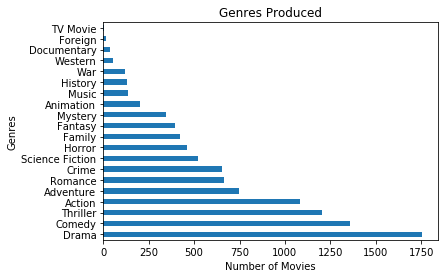

In [27]:
# ploting genres vs number of movies
genres_count.plot(kind = 'barh')
plt.title('Genres Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

### Research Question 6: What is the relationship between revenue and budget?

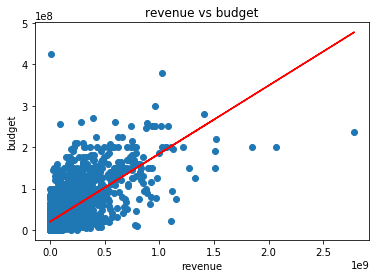

In [28]:
# ploting revenue against budget
#calling function defined above
plot_scatter('revenue','budget')

In [29]:
# correlation between revenue and budget
print(df['revenue'].corr(df['budget']))

0.6885561524636742


<a id='conclusions'></a>
## Conclusions
So far, I have explored and invetigated the TMDB movies dataset using pandas, numpy and matplotlib libraries. Below are some the key insight that was discovered:
* 2011 had the highest count of movies produced (199), while 1969 had the lowest (4).
* Avatar, Star Wars, Titanic, Jurassic World, and Furious 7 are the top 5 most profitable movies.
* Most popular movies are Jurassic World, Mad Max: Fury Road, Intersterllar, Guardians of the Galaxy, and Insurgent.
* From the data visualization, profit seems to increase as popularity increase, with a correlation of 0.596.
* Drama, Comedy, Thriller, Action, and Adventure are the 5 most produced genres.
* Movies with high budget generated high revenue; this was confirmed with a positive correlation of 0.689.


## Limitation
The original dataset lacked several data quality issues as many rows were removed due missing data. Drop these missing data affected the result of the analysis. Also there was no currency unit for the budget and revenue columns.

I made use of stackoverflow, geeksforgeeks, and w3schools to learn more about some python/pandas syntax.

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0